In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [2]:
# Estilo base
plt.style.use('seaborn-v0_8')

# Configuración global profesional
mpl.rcParams.update({
    'font.size': 10,
    'figure.figsize': (16, 10),
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'legend.fontsize': 9,
    'axes.grid': True,
    'grid.alpha': 0.3
})

print("Configuración profesional de visualización cargada")

Configuración profesional de visualización cargada


In [3]:
# Paleta de colores corporativa
colores = [
    '#1f77b4',  # Azul
    '#ff7f0e',  # Naranja
    '#2ca02c',  # Verde
    '#d62728',  # Rojo
    '#9467bd',  # Morado
    '#8c564b'   # Marrón
]

print("Paleta de colores definida")

Paleta de colores definida


In [6]:
# Semilla para reproducibilidad
np.random.seed(42)

# Número de órdenes
n_ordenes = 2000

# Dataset de e-commerce
df = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_ordenes, freq='h'),
    'cliente_id': np.random.randint(1, 401, n_ordenes),
    'categoria': np.random.choice(
        ['Electrónica', 'Ropa', 'Hogar', 'Libros', 'Deportes'], 
        n_ordenes
    ),
    'subtotal': np.round(np.random.lognormal(4.5, 0.8, n_ordenes), 2),
    'descuento': np.round(np.random.uniform(0, 0.3, n_ordenes), 2),
    'envio': np.round(np.random.uniform(5, 25, n_ordenes), 2),
    'region': np.random.choice(
        ['Madrid', 'Barcelona', 'Valencia', 'Sevilla'], 
        n_ordenes
    ),
    'metodo_pago': np.random.choice(
        ['Tarjeta', 'PayPal', 'Transferencia'], 
        n_ordenes, 
        p=[0.7, 0.2, 0.1]
    )
})

print(f"Dataset creado con {len(df)} órdenes")

Dataset creado con 2000 órdenes


In [5]:
# Métricas derivadas
df['total'] = df['subtotal'] * (1 - df['descuento']) + df['envio']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

# Resumen rápido
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")
print(f"Total ventas: ${df['total'].sum():,.2f}")
print(f"Ticket promedio: ${df['total'].mean():.2f}")

Período: 2024-01-01 00:00:00 a 2024-03-24 07:00:00
Total ventas: $243,897.90
Ticket promedio: $121.95


In [7]:
# Calcular métricas
df['total'] = df['subtotal'] * (1 - df['descuento']) + df['envio']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

print(f"Dataset de e-commerce creado: {len(df)} órdenes")
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")

Dataset de e-commerce creado: 2000 órdenes
Período: 2024-01-01 00:00:00 a 2024-03-24 07:00:00


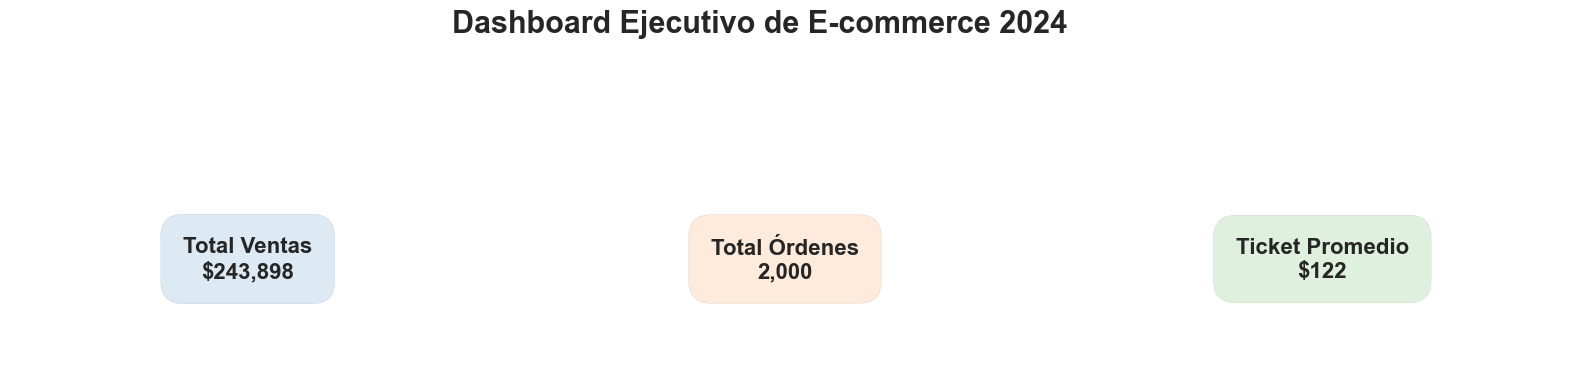

In [8]:
# ==============================
# PASO 3: Layout del Dashboard y KPIs
# ==============================

from matplotlib.gridspec import GridSpec

# Crear figura principal
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(
    nrows=4,
    ncols=6,
    figure=fig,
    hspace=0.35,
    wspace=0.3
)

# Título principal del dashboard
fig.suptitle(
    'Dashboard Ejecutivo de E-commerce 2024',
    fontsize=22,
    fontweight='bold',
    y=0.96
)

# ==============================
# KPIs SUPERIORES
# ==============================

ax_kpi1 = fig.add_subplot(gs[0, :2])
ax_kpi2 = fig.add_subplot(gs[0, 2:4])
ax_kpi3 = fig.add_subplot(gs[0, 4:])

# KPI 1: Total de ventas
total_ventas = df['total'].sum()
ax_kpi1.text(
    0.5, 0.5,
    f'Total Ventas\n${total_ventas:,.0f}',
    ha='center', va='center',
    fontsize=16, fontweight='bold',
    bbox=dict(boxstyle='round,pad=1', facecolor=colores[0], alpha=0.15)
)
ax_kpi1.axis('off')

# KPI 2: Total de órdenes
num_ordenes = len(df)
ax_kpi2.text(
    0.5, 0.5,
    f'Total Órdenes\n{num_ordenes:,}',
    ha='center', va='center',
    fontsize=16, fontweight='bold',
    bbox=dict(boxstyle='round,pad=1', facecolor=colores[1], alpha=0.15)
)
ax_kpi2.axis('off')

# KPI 3: Ticket promedio
ticket_promedio = df['total'].mean()
ax_kpi3.text(
    0.5, 0.5,
    f'Ticket Promedio\n${ticket_promedio:,.0f}',
    ha='center', va='center',
    fontsize=16, fontweight='bold',
    bbox=dict(boxstyle='round,pad=1', facecolor=colores[2], alpha=0.15)
)
ax_kpi3.axis('off')

plt.show()


Dashboard comprehensivo guardado como 'dashboard_ecommerce_completo.png'


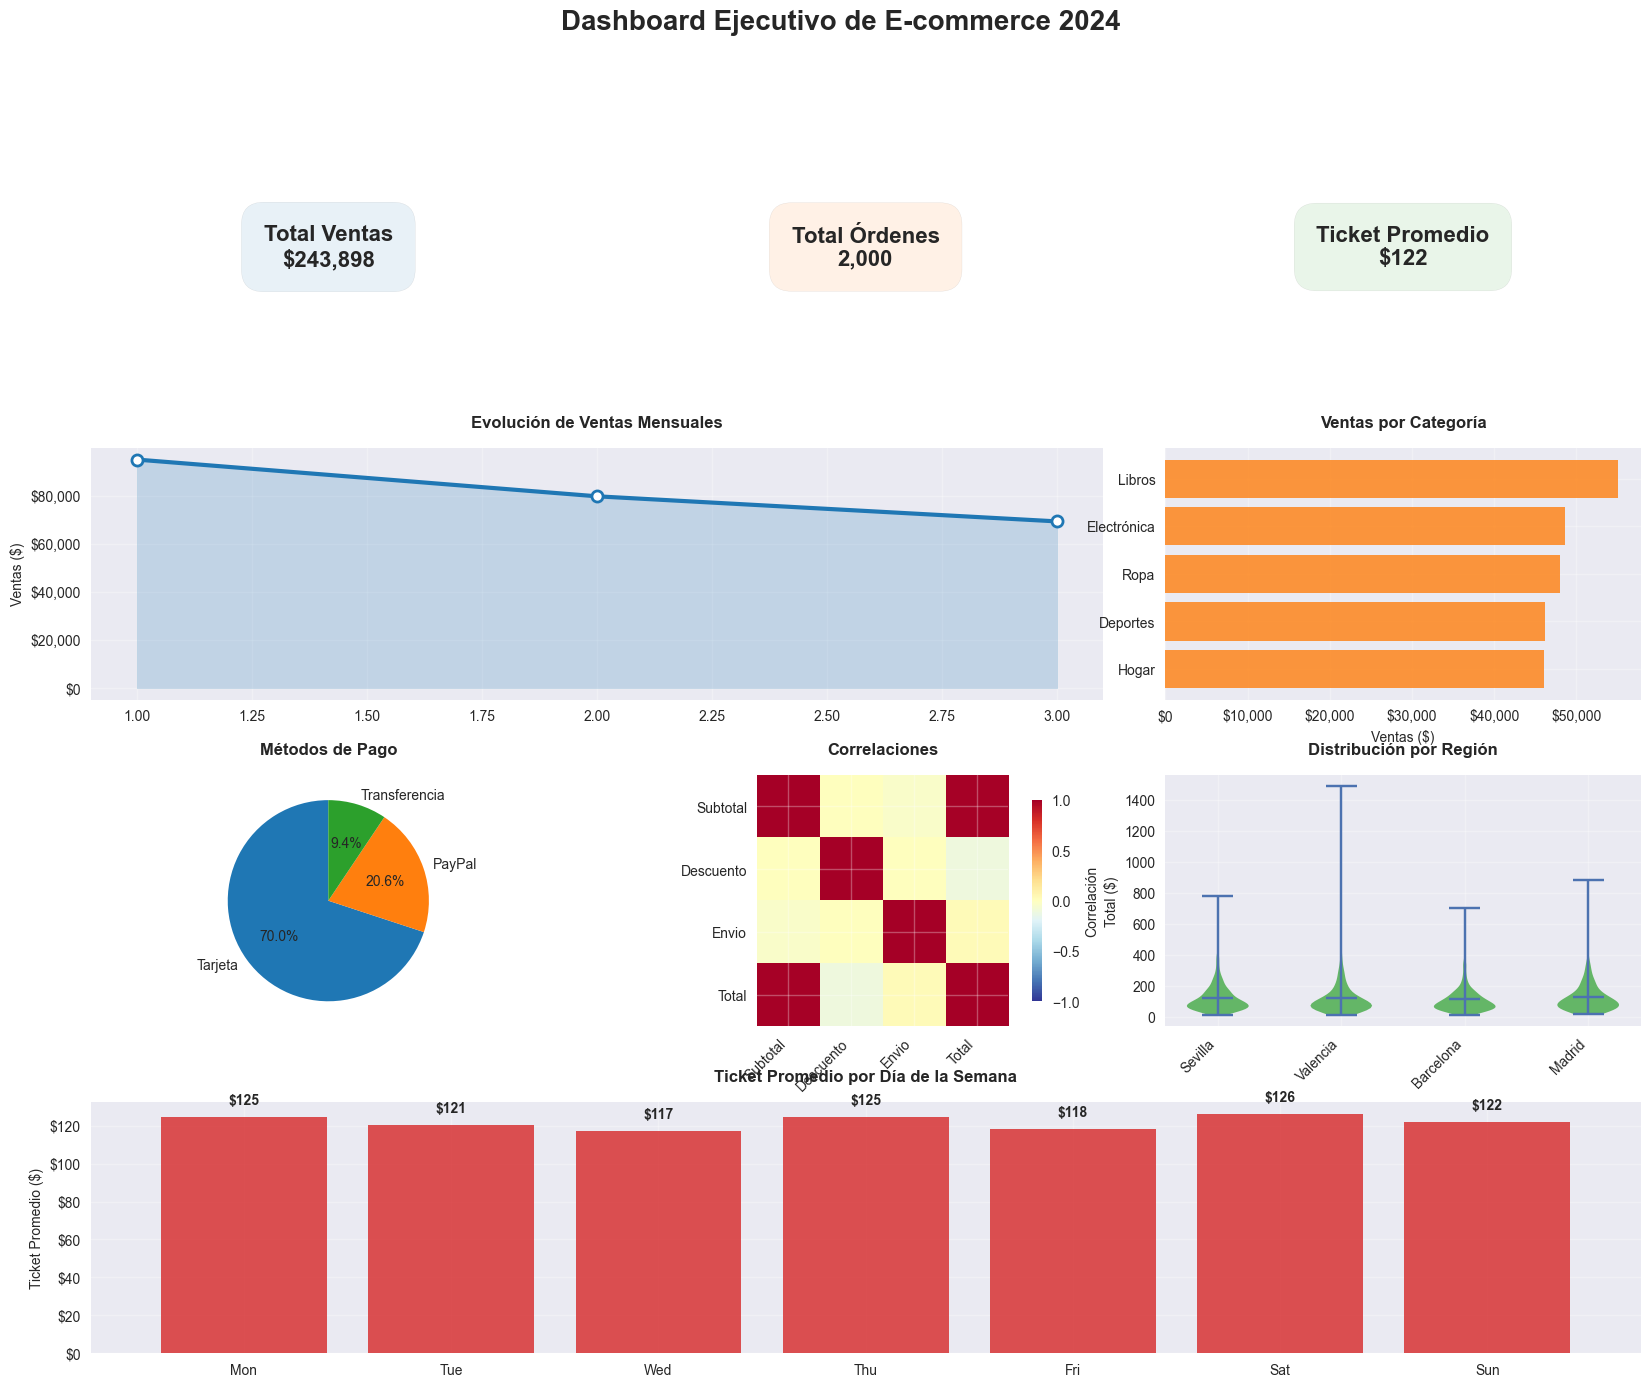

In [13]:
# Crear dashboard con GridSpec para layout flexible
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 6, figure=fig, hspace=0.3, wspace=0.3)

# Título principal
fig.suptitle('Dashboard Ejecutivo de E-commerce 2024', fontsize=20, fontweight='bold', y=0.95)

# 1. KPIs principales (superior)
ax_kpi1 = fig.add_subplot(gs[0, :2])
ax_kpi2 = fig.add_subplot(gs[0, 2:4])
ax_kpi3 = fig.add_subplot(gs[0, 4:])

# KPI 1: Total de ventas
total_ventas = df['total'].sum()
ax_kpi1.text(0.5, 0.5, f'Total Ventas\n${total_ventas:,.0f}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=colores[0], alpha=0.1))
ax_kpi1.set_xlim(0, 1)
ax_kpi1.set_ylim(0, 1)
ax_kpi1.axis('off')

# KPI 2: Número de órdenes
num_ordenes = len(df)
ax_kpi2.text(0.5, 0.5, f'Total Órdenes\n{num_ordenes:,}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=colores[1], alpha=0.1))
ax_kpi2.axis('off')

# KPI 3: Ticket promedio
ticket_promedio = df['total'].mean()
ax_kpi3.text(0.5, 0.5, f'Ticket Promedio\n${ticket_promedio:.0f}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=colores[2], alpha=0.1))
ax_kpi3.axis('off')

# 2. Tendencia mensual (fila 1, columnas 0-3)
ax_trend = fig.add_subplot(gs[1, :4])
ventas_mes = df.groupby('mes')['total'].sum()
ax_trend.plot(ventas_mes.index, ventas_mes.values, 'o-', linewidth=3, 
              color=colores[0], markersize=8, markerfacecolor='white', markeredgewidth=2)
ax_trend.fill_between(ventas_mes.index, ventas_mes.values, alpha=0.2, color=colores[0])
ax_trend.set_title('Evolución de Ventas Mensuales', fontweight='bold', pad=15)
ax_trend.set_ylabel('Ventas ($)')
ax_trend.grid(True, alpha=0.3)
ax_trend.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

# 3. Distribución por categoría (fila 1, columnas 4-5)
ax_categoria = fig.add_subplot(gs[1, 4:])
ventas_cat = df.groupby('categoria')['total'].sum().sort_values(ascending=True)
bars = ax_categoria.barh(ventas_cat.index, ventas_cat.values, color=colores[1], alpha=0.8)
ax_categoria.set_title('Ventas por Categoría', fontweight='bold', pad=15)
ax_categoria.set_xlabel('Ventas ($)')
ax_categoria.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

# 4. Análisis de métodos de pago (fila 2, izquierda)
ax_pago = fig.add_subplot(gs[2, :2])
pago_counts = df['metodo_pago'].value_counts()
wedges, texts, autotexts = ax_pago.pie(pago_counts.values, labels=pago_counts.index, 
                                      autopct='%1.1f%%', colors=colores[:3], startangle=90)
ax_pago.set_title('Métodos de Pago', fontweight='bold', pad=15)

# 5. Heatmap de correlaciones (fila 2, centro)
ax_corr = fig.add_subplot(gs[2, 2:4])
numeric_cols = ['subtotal', 'descuento', 'envio', 'total']
corr_matrix = df[numeric_cols].corr()
im = ax_corr.imshow(corr_matrix, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax_corr.set_xticks(np.arange(len(numeric_cols)))
ax_corr.set_yticks(np.arange(len(numeric_cols)))
ax_corr.set_xticklabels([col.title() for col in numeric_cols], rotation=45, ha='right')
ax_corr.set_yticklabels([col.title() for col in numeric_cols])
ax_corr.set_title('Correlaciones', fontweight='bold', pad=15)

# Barra de color para heatmap
cbar = fig.colorbar(im, ax=ax_corr, shrink=0.8)
cbar.set_label('Correlación')

# 6. Violin plot por región (fila 2, derecha)
ax_region = fig.add_subplot(gs[2, 4:])
region_data = [df[df['region'] == region]['total'] for region in df['region'].unique()]
vp = ax_region.violinplot(region_data, showmeans=True)
for pc in vp['bodies']:
    pc.set_facecolor(colores[2])
    pc.set_alpha(0.7)
ax_region.set_xticks(range(1, len(df['region'].unique()) + 1))
ax_region.set_xticklabels(df['region'].unique(), rotation=45, ha='right')
ax_region.set_title('Distribución por Región', fontweight='bold', pad=15)
ax_region.set_ylabel('Total ($)')

# 7. Análisis de días de la semana (fila 3, completa)
ax_dia = fig.add_subplot(gs[3, :])
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia = df.groupby('dia_semana')['total'].mean().reindex(orden_dias)
bars_dia = ax_dia.bar(range(len(ventas_dia)), ventas_dia.values, color=colores[3], alpha=0.8)
ax_dia.set_xticks(range(len(ventas_dia)))
ax_dia.set_xticklabels([dia[:3] for dia in orden_dias])
ax_dia.set_title('Ticket Promedio por Día de la Semana', fontweight='bold', pad=15)
ax_dia.set_ylabel('Ticket Promedio ($)')
ax_dia.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax_dia.grid(True, alpha=0.3, axis='y')

# Añadir valores encima de las barras
for bar, valor in zip(bars_dia, ventas_dia.values):
    height = bar.get_height()
    ax_dia.text(bar.get_x() + bar.get_width()/2., height + 5, 
               f'${valor:.0f}', ha='center', va='bottom', fontweight='bold')

plt.savefig('dashboard_ecommerce_completo.png', dpi=300, bbox_inches='tight')
print("\nDashboard comprehensivo guardado como 'dashboard_ecommerce_completo.png'")

In [14]:
import pandas as pd

# ============================
# 1. Crear tablas derivadas
# ============================

# Ventas por mes
tabla_ventas_mes = (
    df.groupby('mes')['total']
    .sum()
    .reset_index()
    .rename(columns={'total': 'ventas_totales'})
)

# Ventas por categoría
tabla_ventas_categoria = (
    df.groupby('categoria')['total']
    .sum()
    .reset_index()
    .rename(columns={'total': 'ventas_totales'})
)

# Ventas por región
tabla_ventas_region = (
    df.groupby('region')['total']
    .agg(['sum', 'mean', 'count'])
    .reset_index()
    .rename(columns={
        'sum': 'ventas_totales',
        'mean': 'ticket_promedio',
        'count': 'num_ordenes'
    })
)

# Distribución por método de pago
tabla_metodo_pago = (
    df['metodo_pago']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'metodo_pago', 'metodo_pago': 'cantidad'})
)

# Ticket promedio por día de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tabla_ticket_dia = (
    df.groupby('dia_semana')['total']
    .mean()
    .reindex(orden_dias)
    .reset_index()
    .rename(columns={'total': 'ticket_promedio'})
)

# Matriz de correlación
tabla_correlaciones = df[['subtotal', 'descuento', 'envio', 'total']].corr().reset_index()

# ============================
# 2. Exportar a Excel
# ============================

archivo_excel = "dataset_y_tablas_dashboard_ecommerce_dia3.xlsx"

with pd.ExcelWriter(archivo_excel) as writer:
    df.to_excel(writer, sheet_name='dataset_completo', index=False)
    tabla_ventas_mes.to_excel(writer, sheet_name='ventas_por_mes', index=False)
    tabla_ventas_categoria.to_excel(writer, sheet_name='ventas_por_categoria', index=False)
    tabla_ventas_region.to_excel(writer, sheet_name='ventas_por_region', index=False)
    tabla_metodo_pago.to_excel(writer, sheet_name='metodos_de_pago', index=False)
    tabla_ticket_dia.to_excel(writer, sheet_name='ticket_por_dia', index=False)
    tabla_correlaciones.to_excel(writer, sheet_name='correlaciones', index=False)

print("Archivo Excel generado correctamente:")
print(archivo_excel)

Archivo Excel generado correctamente:
dataset_y_tablas_dashboard_ecommerce_dia3.xlsx
